Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read the data

In [3]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company['ShelveLoc']=pd.Categorical(company['ShelveLoc'])
company['ShelveLoc']=company['ShelveLoc'].cat.codes

In [5]:
company['Urban']=pd.Categorical(company['Urban'])
company['Urban']=company['Urban'].cat.codes

In [6]:
company['US']=pd.Categorical(company['US'])
company['US']=company['US'].cat.codes

In [7]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int8   
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int8   
 10  US           400 non-null    int8   
dtypes: float64(1), int64(7), int8(3)
memory usage: 26.3 KB


In [9]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [10]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

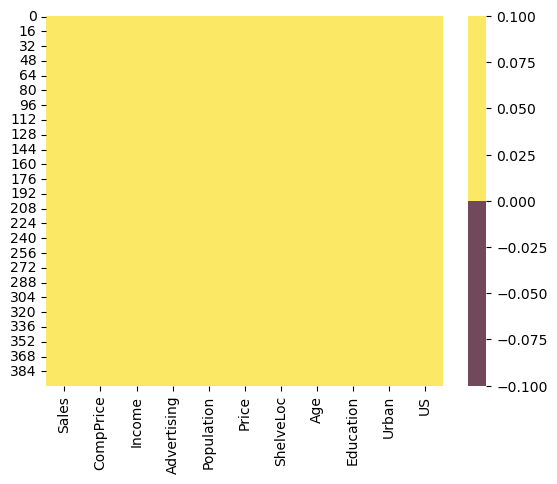

In [11]:
color=['#72495B','#FBE965']
pal=sns.color_palette(color)
sns.heatmap(company.isnull(),cmap=pal)

In [12]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<Axes: >

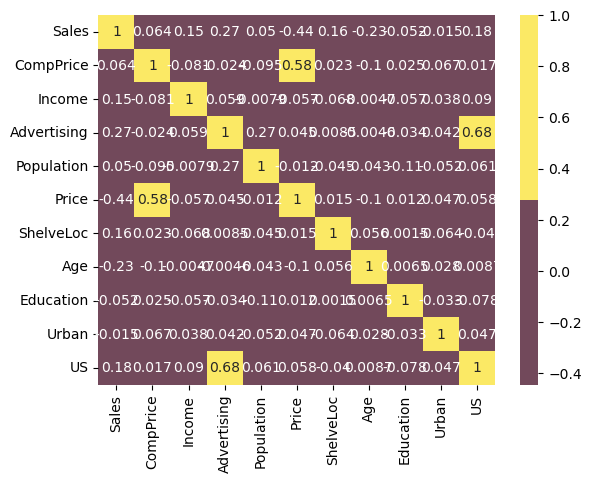

In [13]:
color=['#72495B','#FBE965']
pal=sns.color_palette(color)
sns.heatmap(company.corr(),cmap=pal,annot=True)

In [14]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


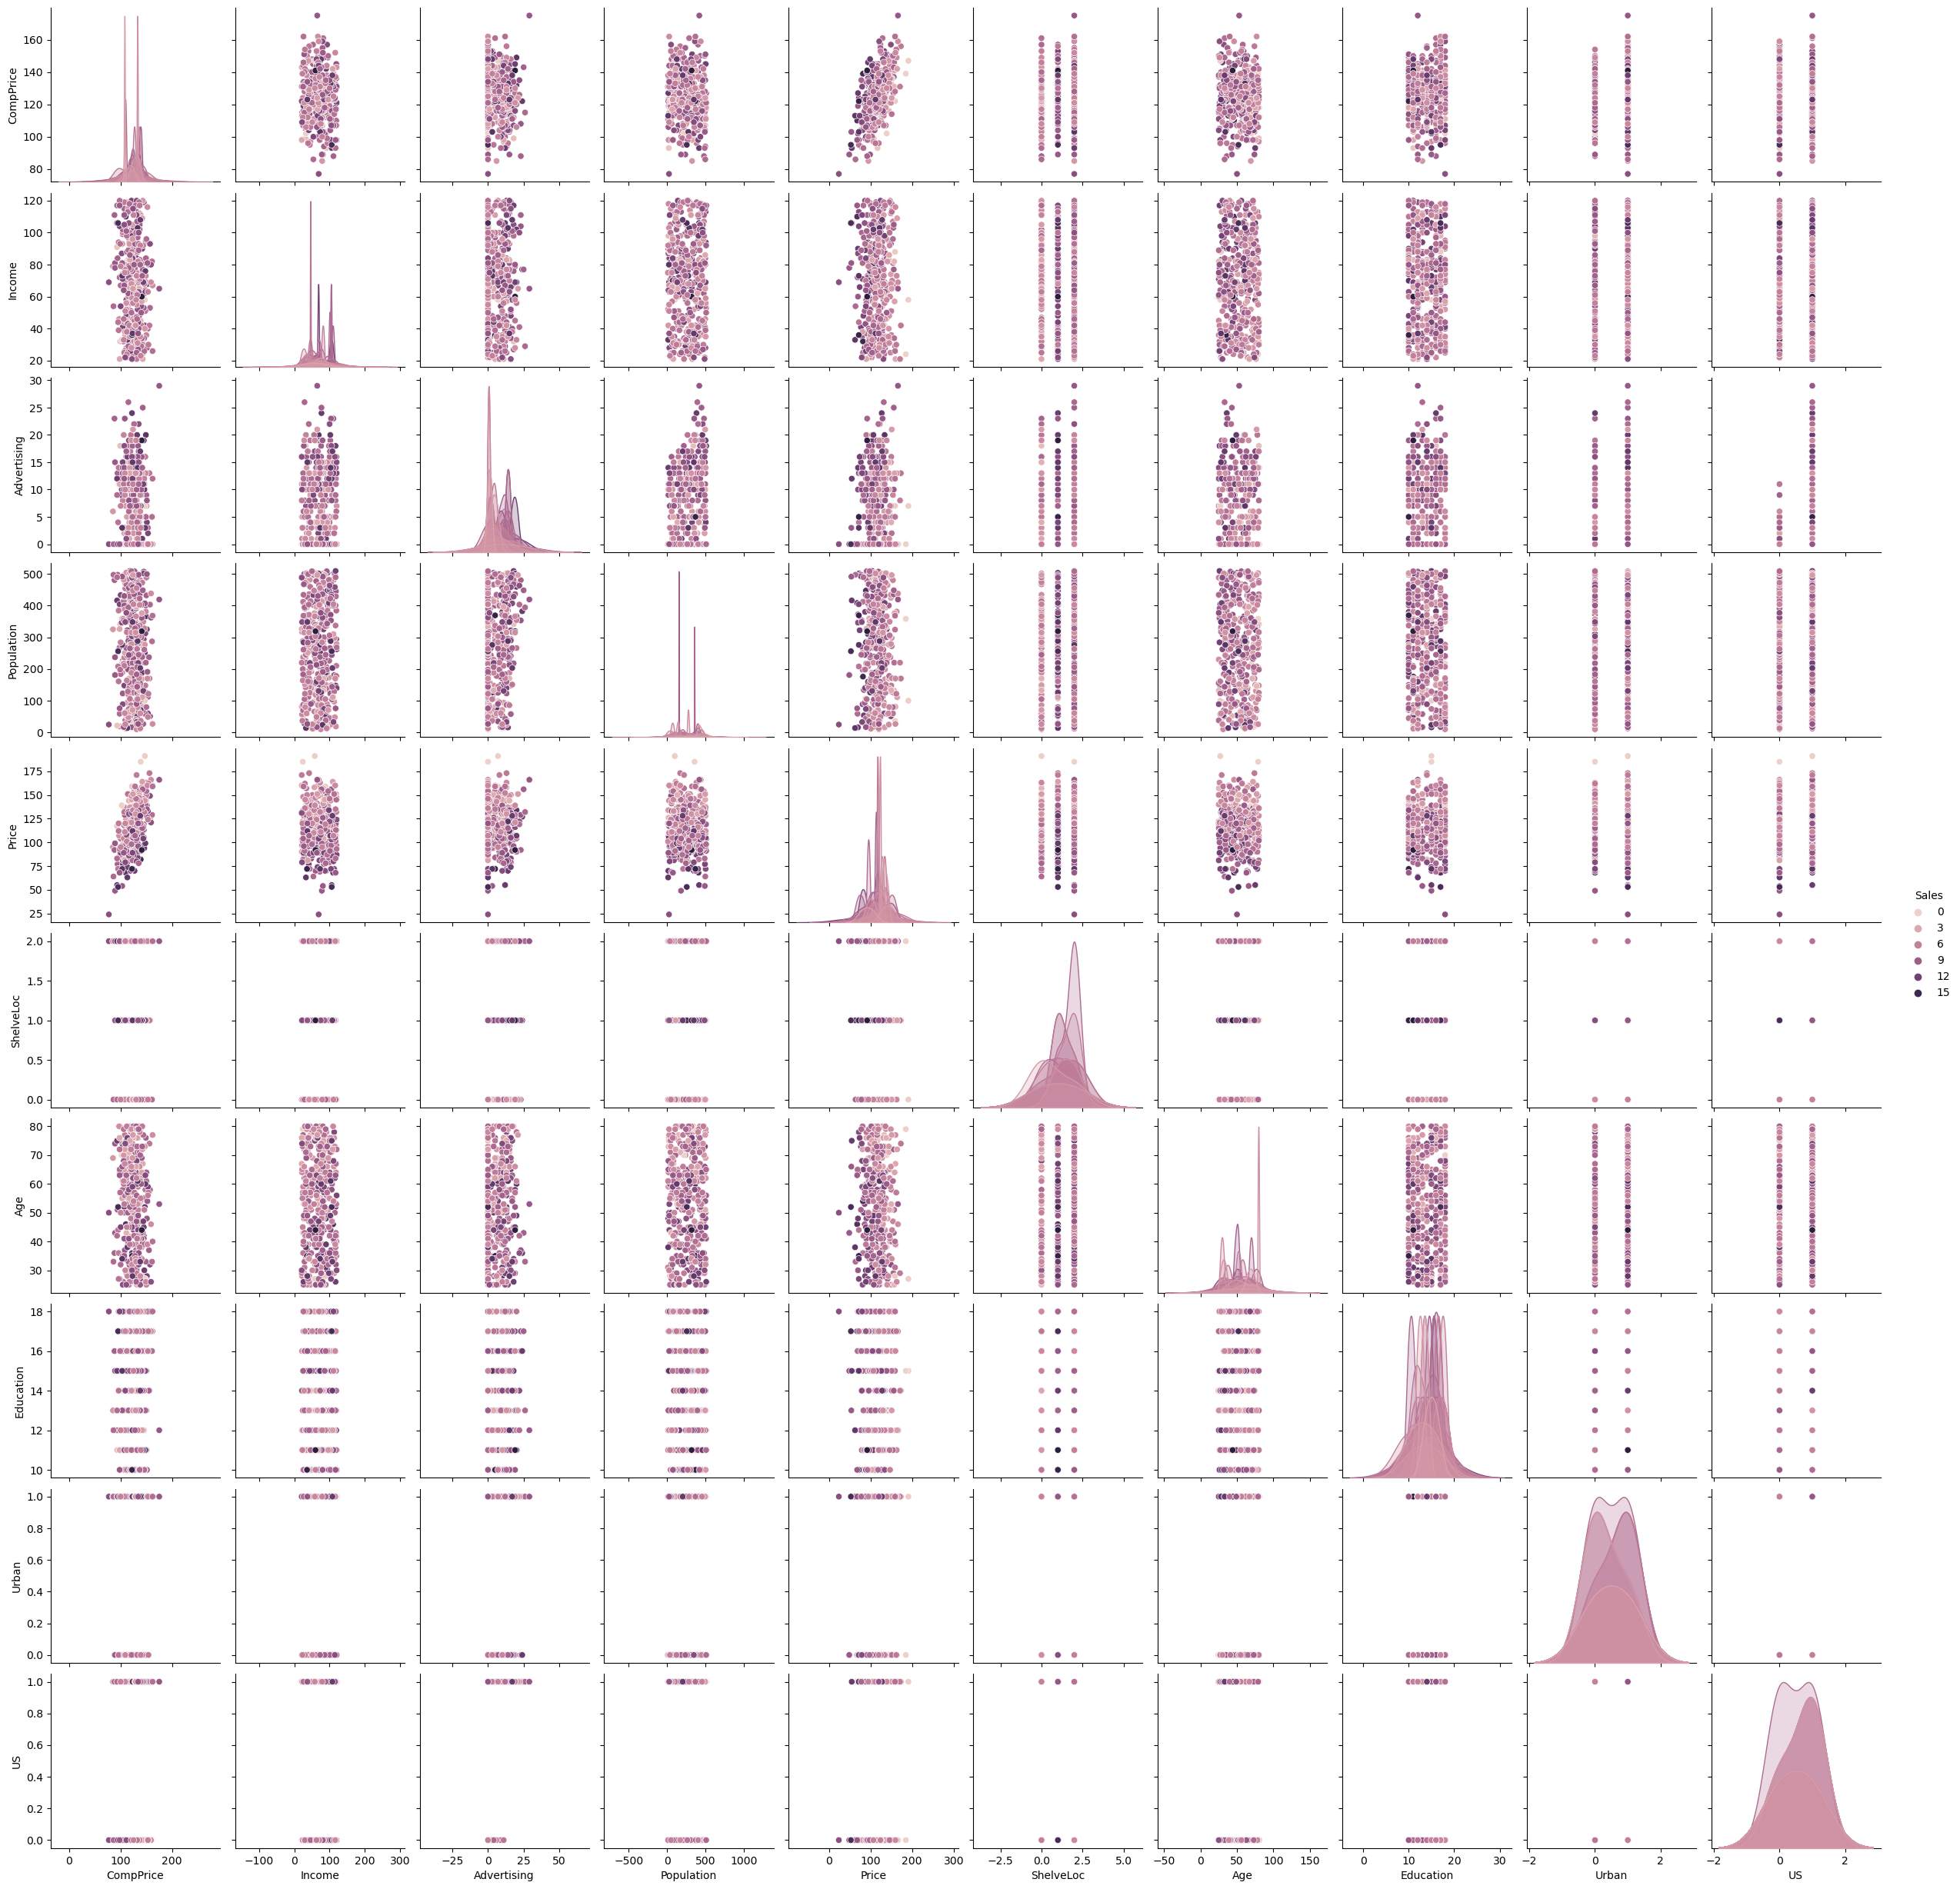

In [15]:
sns.pairplot(data=company ,hue='Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'CompPrice'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'Advertising'),
  Text(4, 0, 'Population'),
  Text(5, 0, 'Price'),
  Text(6, 0, 'ShelveLoc'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Urban'),
  Text(10, 0, 'US')])

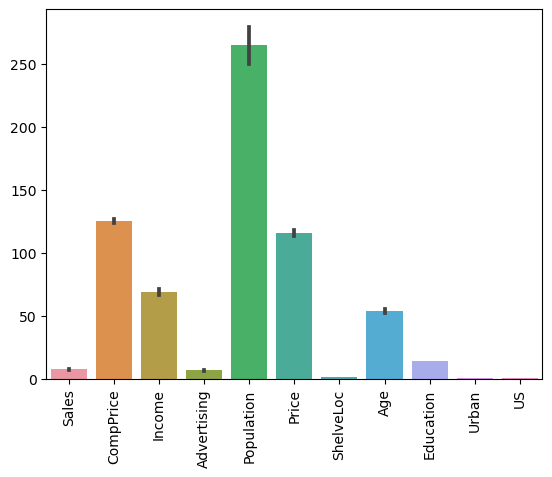

In [16]:
sns.barplot(data=company)
plt.xticks(rotation=90)

In [17]:
X=company.iloc[:,1:11]
y=company.iloc[:,0]

In [18]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

# split the data into train and test dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

# Build the model 

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model=DecisionTreeRegressor(max_depth=8,random_state=42, min_samples_leaf=10,criterion='squared_error')

In [26]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=42)

# predict and get metrics for the training data

In [28]:
from sklearn.metrics import mean_squared_error
import math


In [29]:
train_pred=model.predict(X_train)

In [30]:
train_mse=mean_squared_error(y_train,train_pred)

In [31]:
train_rmse=math.sqrt(train_mse)

In [32]:
train_mse,train_rmse

(2.234485373628747, 1.4948195120578092)

# predict and get metrics for the testing data

In [34]:
test_pred=model.predict(X_test)

In [35]:
test_mse=mean_squared_error(y_test,test_pred)

In [36]:
test_rmse=math.sqrt(test_mse)

In [37]:
test_mse,test_rmse

(4.453745223943031, 2.110389827482835)

# plot the regression tree

In [39]:
from sklearn.tree import plot_tree

In [40]:
fnames=company.columns
fnames

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [41]:
cname=company['Sales'].unique()
cname

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

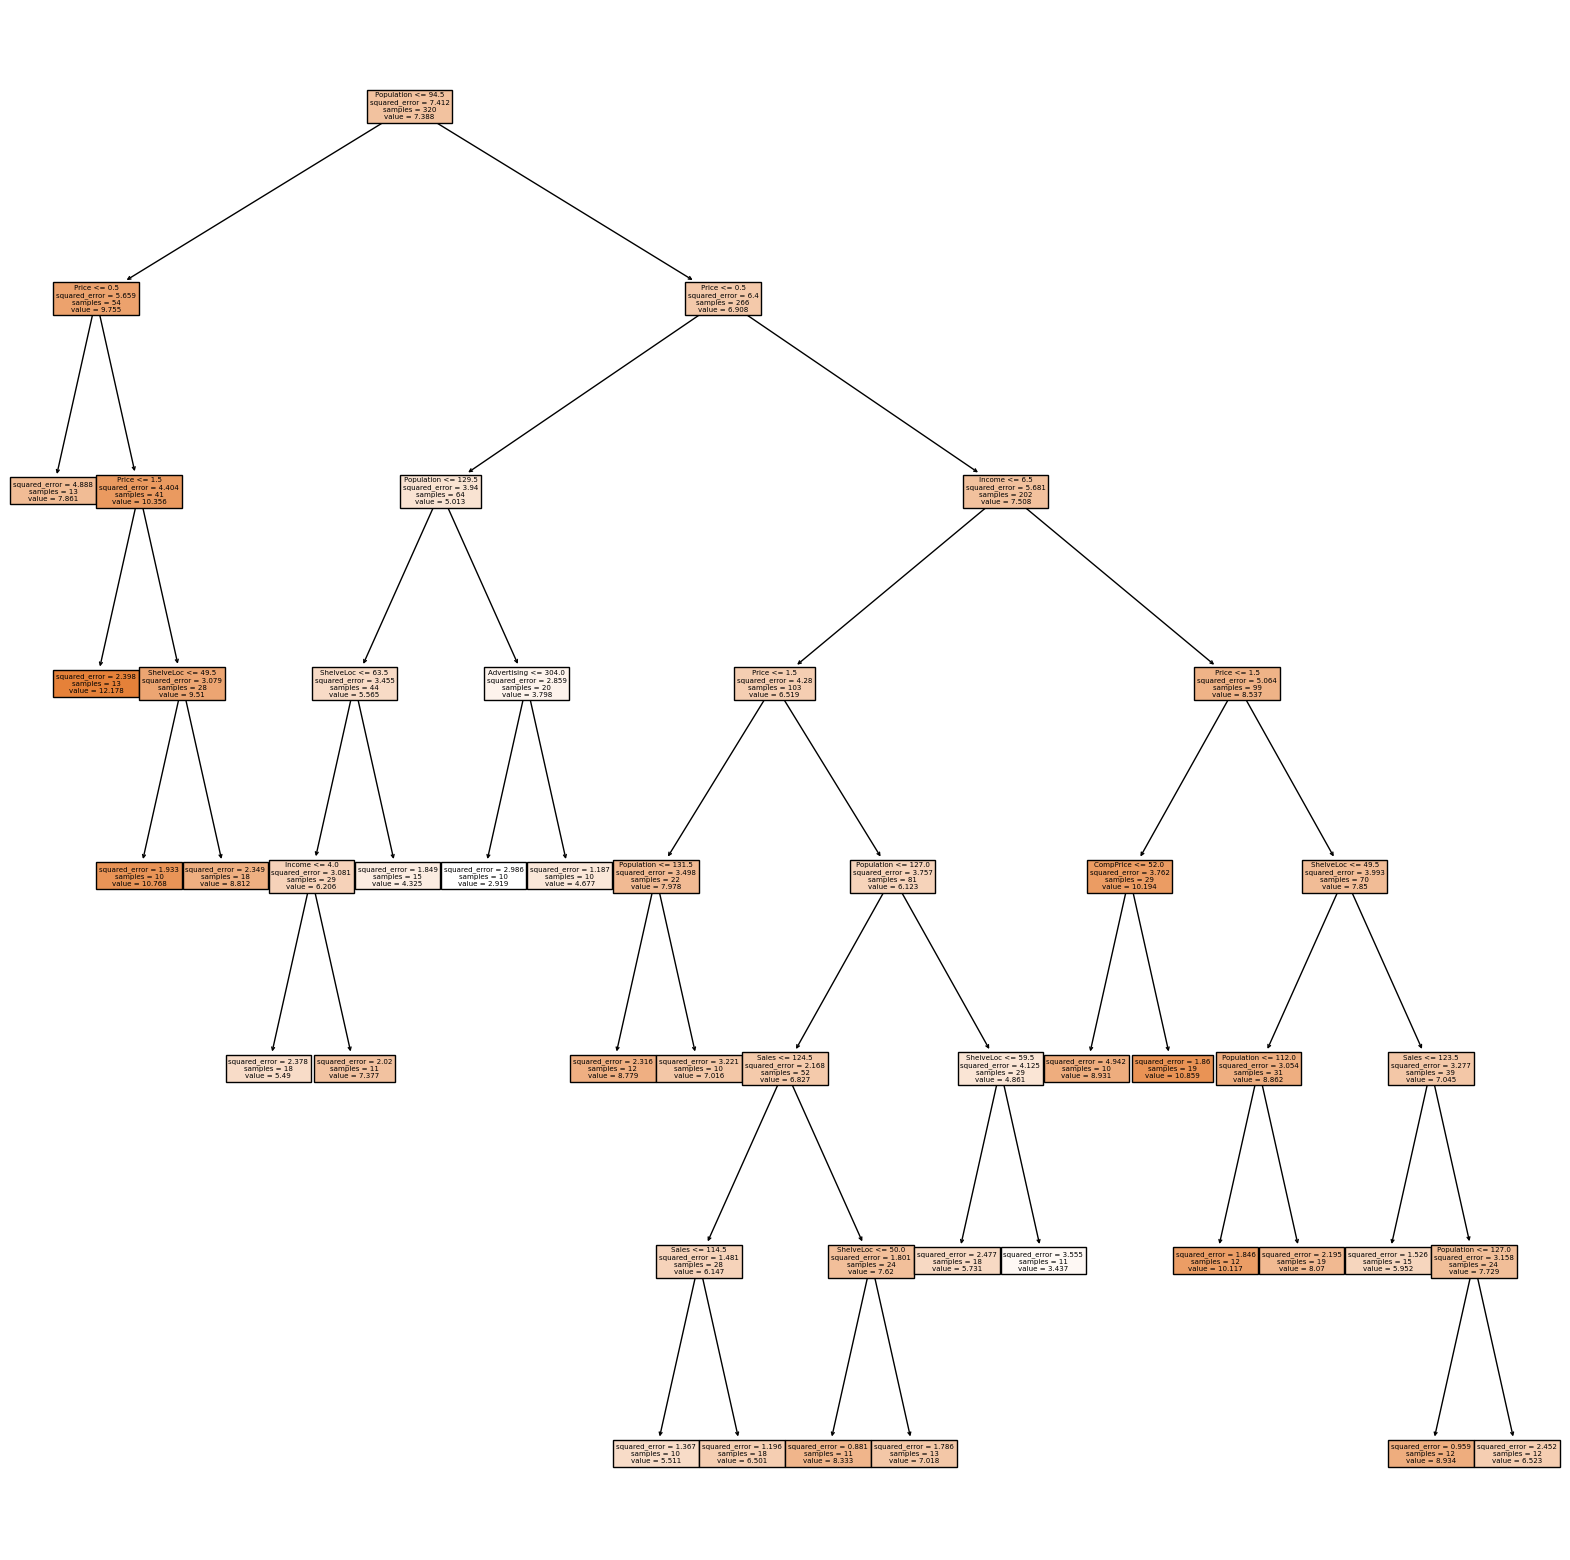

In [42]:
plt.figure(figsize=(20,20))
plot_tree(model,feature_names=fnames.tolist(),class_names=cname.tolist(),filled=True)
plt.show()

# predict New data 

In [44]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [45]:
new_data=pd.DataFrame({'CompPrice':145,'Income':24,'Advertising':7,'Population':300,'Price':140,'ShelveLoc':2,'Age':50,'Education':14,'Urban':1,'US':1},index=[1])
new_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,145,24,7,300,140,2,50,14,1,1


In [46]:
model.predict(new_data)

array([6.52333333])

# visualize the  company data

In [48]:
from sklearn.manifold import TSNE

In [49]:
model1=TSNE(n_components=2)

In [50]:
tsne_comps=model1.fit_transform(X)
tsne_comps

array([[-3.96979749e-01, -9.08050060e-01],
       [ 3.67142767e-01,  5.02457762e+00],
       [-2.70901650e-01,  5.51922083e+00],
       [-3.11575508e+01,  2.10592890e+00],
       [-1.07127323e+01, -7.40375280e-01],
       [-3.51244202e+01,  3.04561400e+00],
       [ 3.91685638e+01,  7.57670343e-01],
       [-2.68870506e+01, -1.58030486e+00],
       [ 2.42739162e+01,  3.81234646e+00],
       [ 2.29321995e+01,  3.96230030e+00],
       [ 1.67305984e+01,  3.06458771e-01],
       [-3.48690414e+01,  1.55022025e+00],
       [-1.98258762e+01, -6.18279505e+00],
       [ 3.37485008e+01,  2.82523595e-02],
       [ 1.96353855e+01,  4.16230774e+00],
       [-2.67481918e+01, -3.51775694e+00],
       [-3.07144952e+00,  4.75418949e+00],
       [ 3.65299368e+00, -1.80988801e+00],
       [-2.32432919e+01,  3.23589659e+00],
       [ 3.48002968e+01, -1.22297943e+00],
       [-1.59368992e+01, -7.64842927e-01],
       [ 7.84216118e+00, -3.90249991e+00],
       [-3.83005791e+01, -2.07649803e+00],
       [-3.

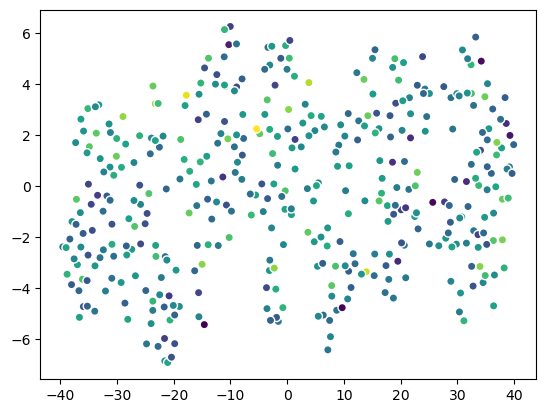

In [51]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [52]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [53]:
fraud['Undergrad']=pd.Categorical(fraud['Undergrad'])
fraud['Undergrad']=fraud['Undergrad'].cat.codes

In [54]:
fraud['Work.Experience']=pd.Categorical(fraud['Work.Experience'])
fraud['Work.Experience']=fraud['Work.Experience'].cat.codes

In [55]:
fraud['Urban']=pd.Categorical(fraud['Urban'])
fraud['Urban']=fraud['Urban'].cat.codes

In [56]:
fraud.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [57]:
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [58]:
fraud['Marital_Status']=pd.Categorical(fraud['Marital_Status'])
fraud['Marital_Status']=fraud['Marital_Status'].cat.codes

In [59]:
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [60]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int8 
 1   Marital_Status   600 non-null    int8 
 2   Taxable_Income   600 non-null    int64
 3   City_Population  600 non-null    int64
 4   Work_Experience  600 non-null    int8 
 5   Urban            600 non-null    int8 
dtypes: int64(2), int8(4)
memory usage: 11.8 KB


In [61]:
fraud.shape

(600, 6)

In [62]:
fraud.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

<Axes: >

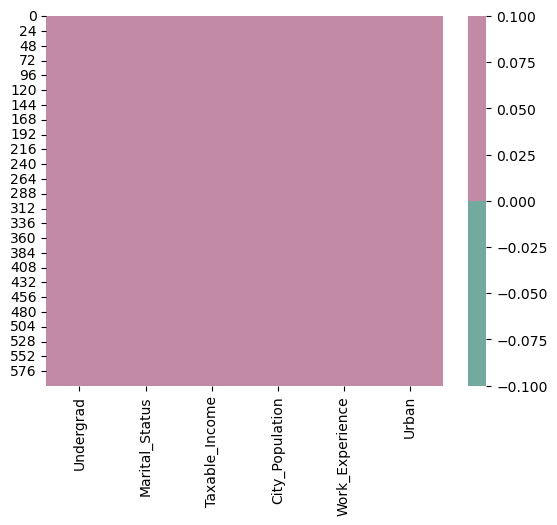

In [63]:
color=['#73AAA0','#C28AA4']
pal=sns.color_palette(color)
sns.heatmap(fraud.isnull(),cmap=pal)

In [64]:
fraud.corr()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital_Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable_Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City_Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work_Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<Axes: >

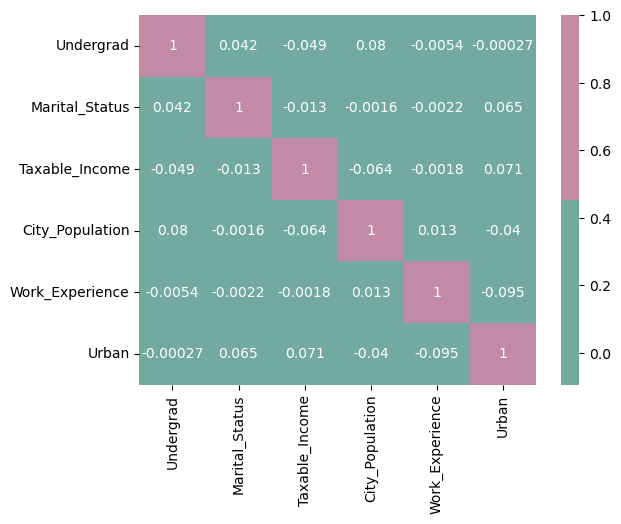

In [65]:
color=['#73AAA0','#C28AA4']
pal=sns.color_palette(color)
sns.heatmap(fraud.corr(),cmap=pal,annot=True)

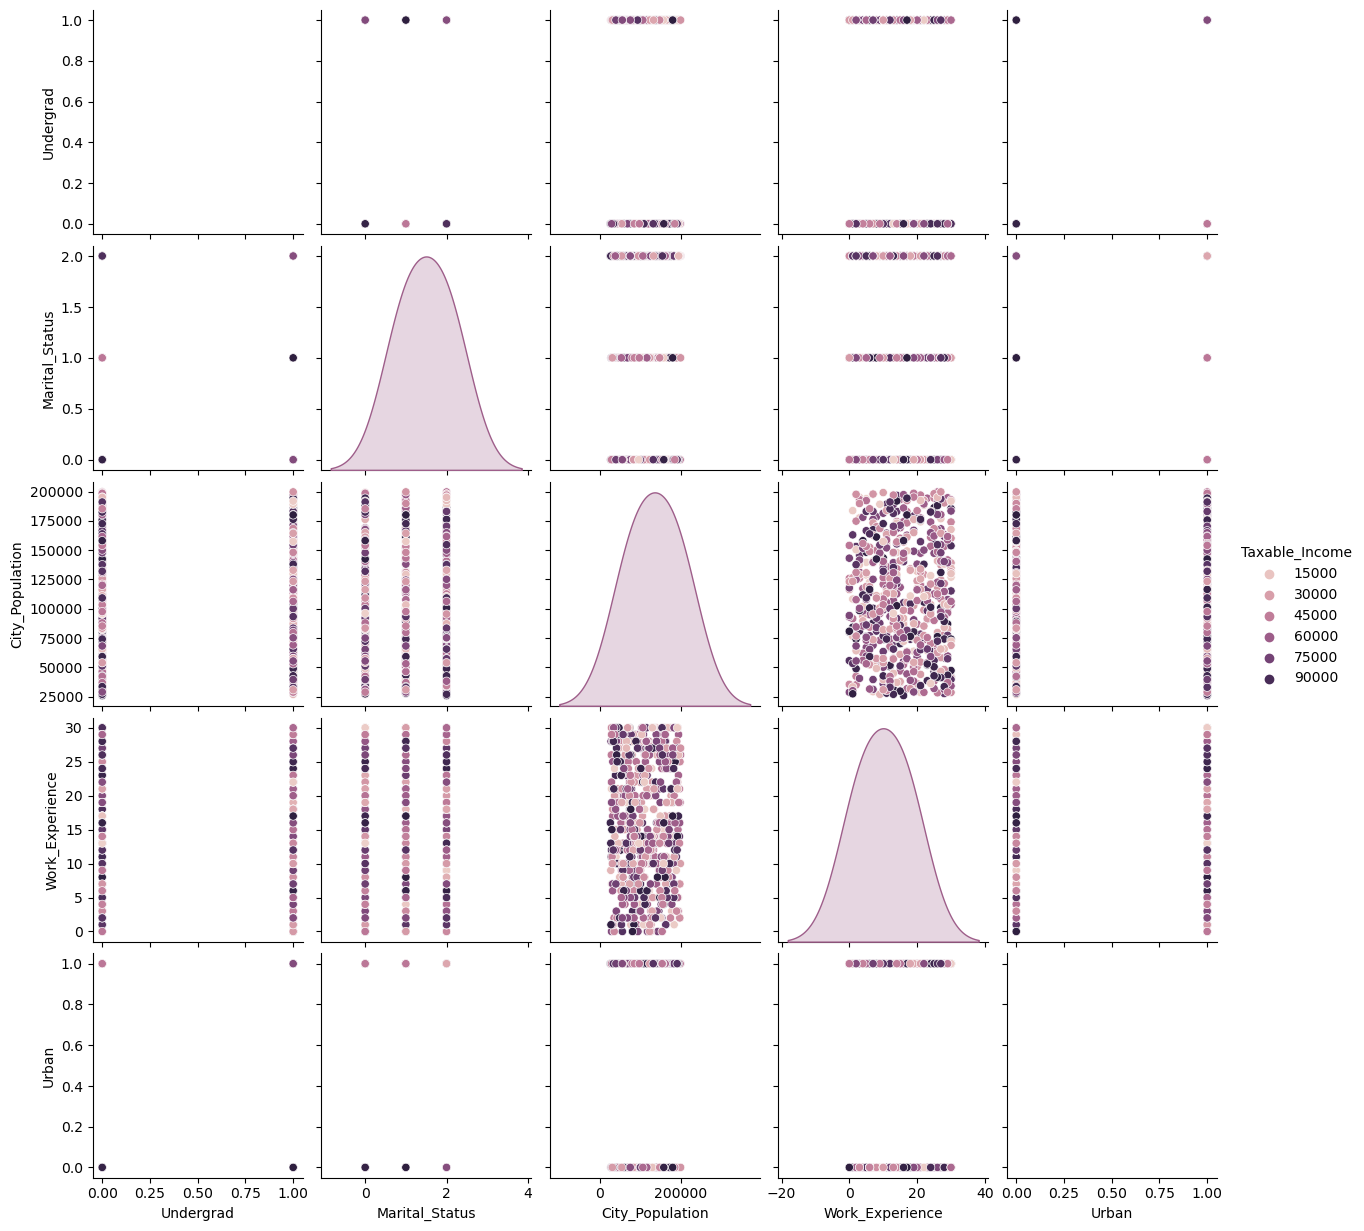

In [66]:
sns.pairplot(data=fraud,hue='Taxable_Income')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Undergrad'),
  Text(1, 0, 'Marital_Status'),
  Text(2, 0, 'Taxable_Income'),
  Text(3, 0, 'City_Population'),
  Text(4, 0, 'Work_Experience'),
  Text(5, 0, 'Urban')])

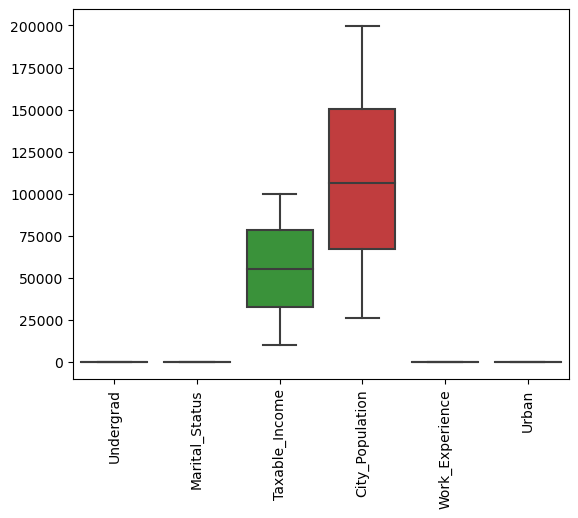

In [67]:
sns.boxplot(data=fraud)
plt.xticks(rotation=90)

In [70]:
fraud['Taxable_income']=fraud['Taxable_Income']

In [72]:
fraud.drop('Taxable_Income',axis=1,inplace=True)

In [73]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_income
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


In [74]:
fraud[fraud.duplicated()]

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_income


In [148]:
fraud['Risk'] = fraud['Taxable_income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [125]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_income,Risk
0,0,2,50047,10,1,68833,Good
1,1,0,134075,18,1,33700,Good
2,0,1,160205,30,1,36925,Good
3,1,2,193264,15,1,50190,Good
4,0,1,27533,28,0,81002,Good
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,Good
596,1,0,55369,2,1,69967,Good
597,0,0,154058,0,1,47334,Good
598,1,1,180083,17,0,98592,Good


In [153]:
fraud['Risk']=pd.Categorical(fraud['Risk'])
fraud['Risk']=fraud['Risk'].cat.codes

In [154]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_income,Risk
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [228]:
fraud.drop('Taxable_income',axis=1,inplace=True)

In [229]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [230]:
X=fraud.iloc[:,:5]
y=fraud.iloc[:,5]

In [231]:
X

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [232]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risk, Length: 600, dtype: int8

# split the data into train and test dataset

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

# build the model

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
fraud_model=DecisionTreeClassifier(max_depth=8, min_samples_leaf=10,random_state=42,criterion='gini')

In [256]:
fraud_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

# predict for training data

In [258]:
train_pred=fraud_model.predict(X_train)
train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Training  metrics

In [260]:
from sklearn.metrics import confusion_matrix,classification_report

In [261]:
confusion_matrix(y_train,train_pred)

array([[375,   7],
       [ 88,  10]], dtype=int64)

In [262]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       382
           1       0.59      0.10      0.17        98

    accuracy                           0.80       480
   macro avg       0.70      0.54      0.53       480
weighted avg       0.76      0.80      0.74       480



# testing metrics

In [264]:
test_pred=fraud_model.predict(X_test)

In [265]:
confusion_matrix(y_test,test_pred)

array([[94,  0],
       [25,  1]], dtype=int64)

In [266]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        94
           1       1.00      0.04      0.07        26

    accuracy                           0.79       120
   macro avg       0.89      0.52      0.48       120
weighted avg       0.84      0.79      0.71       120



# plot the regression tree

In [268]:
from sklearn.tree import plot_tree

In [269]:
fnames=fraud.columns
fnames

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Risk'],
      dtype='object')

In [270]:
cname=fraud['Risk'].unique()
cname

array([0, 1], dtype=int8)

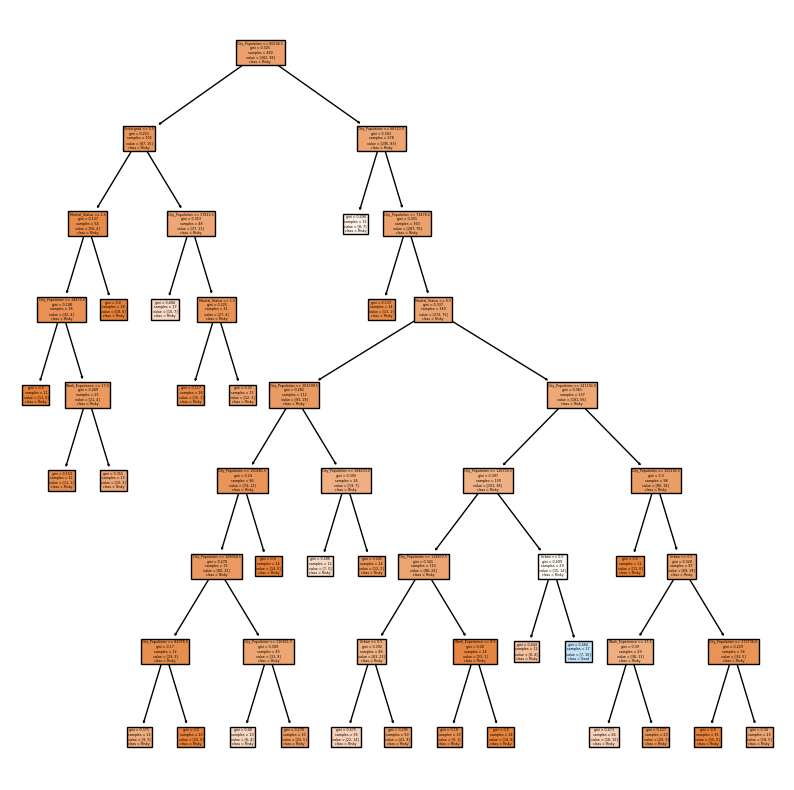

In [273]:
plt.figure(figsize=(10, 10))
class_names = ['Risky', 'Good']
feature_names = fnames.drop('Risk').tolist()
plot_tree(fraud_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# visualize the  company data

In [275]:
model2=TSNE(n_components=2)

In [276]:
tsne_comps=model2.fit_transform(X)
tsne_comps

array([[-36.592903 ,  -6.50295  ],
       [ 14.038481 ,  -3.7544844],
       [ 31.30993  ,  -1.8171748],
       ...,
       [ 27.390749 ,  -3.4830616],
       [ 41.739113 ,   1.3612831],
       [ 29.9232   ,  -2.4692073]], dtype=float32)

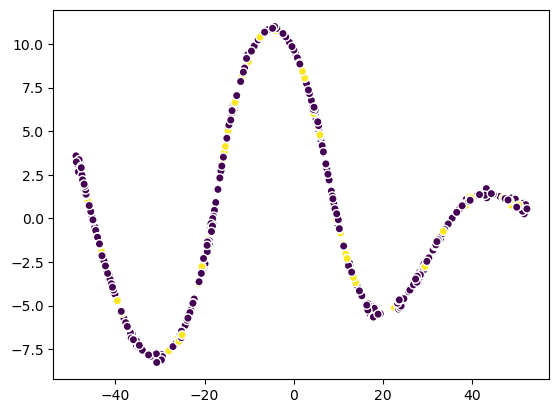

In [277]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='white')
plt.show()

# predict new data

In [279]:
fraud

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [280]:
new_data=pd.DataFrame({'Undergrad':0,'Marital_Status':1,'City_Population':168400,'Work_Experience':10,'Urban':0},index=[1])
new_data

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
1,0,1,168400,10,0


In [281]:
fraud_model.predict(new_data)

array([0], dtype=int8)